# Text Summarization and Visualization

### Grup 5

Anggota Kelompok: 
* Diah Ayu Setyaningsih
* I Nyoman Warsana
* Iman Santoso

## Import Text

Text ini berisi transkrip jawaban kedua capres dan cawapres ketika menjawab pertanyaan:
1. Apa strategi dan kebijakan konkrit Bapak untuk menjaga stabilitas harga komoditas pertanian dan perikanan sehingga sektor ini menarik bagi milenial untuk mewujudkan Indonesia menjadi negara maritim dan agraris yang terkemuka di dunia?
2. Bagaimana strategi dan kebijakan konkrit bapak untuk menjamin partisipasi perempuan Indonesia dalam kegiatan ekonomi agar perlindungan dari diskriminasi dan tindakan kekerasan di dunia kerja bukan hanya sekedar wacana?
3. Strategi dan kebijakan konkrit apa yang akan bapak lakukan dalam lima tahun ke depan untuk mendorong peningkatan tax ratio sekaligus peningkatan penerimaan zakat dan wakaf?

In [1]:
with open('debat 2000.txt') as f:
  speech_text = f.read()

## Text Summarization

In [2]:
import re
from gensim.summarization.summarizer import summarize

def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences
  
def get_summary(text, pct):
    text = str(text)
    summary = summarize(text,ratio=pct,split=True)
    return summary

In [3]:
sentences = split_sentences(speech_text)
sentences

["yes indeed we are already too long commodity commodity we depend to markets outside the country and we 've been too long exported in the form of mentahan raw materials, both the rubber kind that coconut oil well wasfishing well it commodity commodity agriculture that strategy to the next well in field of fisheries as well as in the field of agriculture is downstream is the industrialization needs to be built industrial industry fishery as manyprocessing canning so we ",
 ' exported in the form of items of goods that have been processed already packaging in here already in the labeling in here already built a brand from here so also for commodities commodityplantations to the front we must dare to do hilirisasi prevent that exports we are not in the form of mentahan but minimal goods half- finished or we press to be delivered in the form of goods so and also to areas that relate to the products of agriculture we know children young people have now built an online ecosystem ',
 '',
 'w

In [4]:
print('Printing Summary')
print('--------------------------')
print(get_summary(speech_text, 0.1))

Printing Summary
--------------------------
['Pak Jokowi has been in power four and a half years why allow import of farmers devastated why not do industrialization but focused infrastructure infrastructure do not facilitate the goods outside the entrance to Indonesia is not the goods Indonesia are out of this problem that we say need no reorientation of strategy development need no policy that is firmly stop the flow money out of the country then focus on establishing the industry in all the fields I agree hilirasik downstream but why Dad does not implement the already four and a half years even Mr allow the Minister Minister Mr. allowing commodities of foreign entry into Indonesia by so fast and so trivial Isuppose so possible .', 'the activities of women who start businesses both at home and also business enterprises micro small medium- female female great female self is want a policy that is more aligned so that they can get access to the trainingassistance is also access to the ca

## Visualization

### Data Preprocessing

In [5]:
my_new_text = re.sub('[^ a-z0-9]', '', speech_text.lower())
my_new_text

'yes indeed we are already too long commodity commodity we depend to markets outside the country and we ve been too long exported in the form of mentahan raw materials both the rubber kind that coconut oil well wasfishing well it commodity commodity agriculture that strategy to the next well in field of fisheries as well as in the field of agriculture is downstream is the industrialization needs to be built industrial industry fishery as manyprocessing canning so we  exported in the form of items of goods that have been processed already packaging in here already in the labeling in here already built a brand from here so also for commodities commodityplantations to the front we must dare to do hilirisasi prevent that exports we are not in the form of mentahan but minimal goods half finished or we press to be delivered in the form of goods so and also to areas that relate to the products of agriculture we know children young people have now built an online ecosystem which if this can be

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### Plot Word Cloud

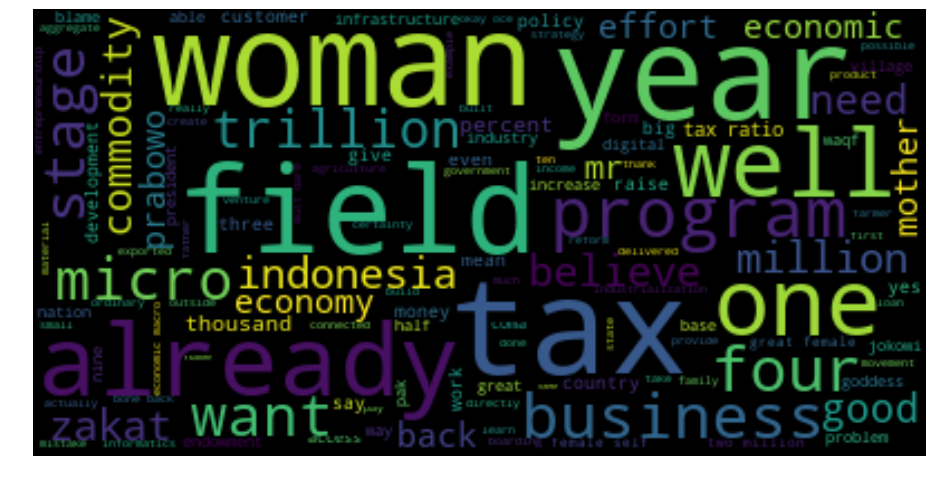

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Most Common Words

In [9]:
from nltk.probability import FreqDist

# How many words are repeated?
freq_words = FreqDist(lemma.lemmatize(word) for word in filtered_sentence)
freq_words.most_common(10)

[('tax', 25),
 ('also', 20),
 ('year', 17),
 ('woman', 17),
 ('field', 15),
 ('already', 13),
 ('well', 11),
 ('one', 11),
 ('program', 11),
 ('million', 11)]

### Dispersion Plot for 10 Most Common Words

In [10]:
topics = []
for word in freq_words.most_common(10):
  topics.append(word[0])
topics

['tax',
 'also',
 'year',
 'woman',
 'field',
 'already',
 'well',
 'one',
 'program',
 'million']

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


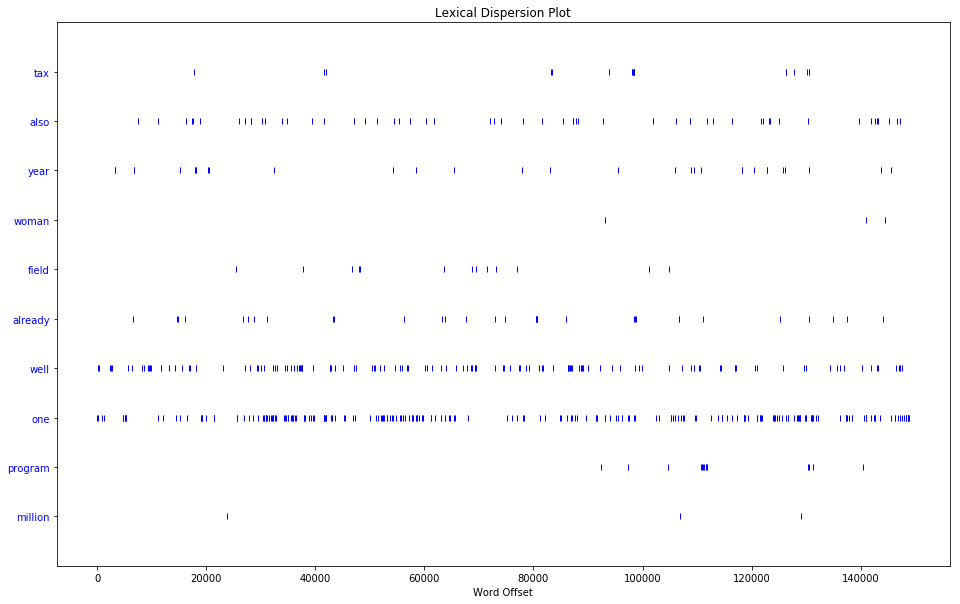

In [11]:
import nltk
from nltk.book import text4 as content
plt.figure(figsize=(16,10))
content.dispersion_plot(topics)